<a href="https://colab.research.google.com/github/logolica99/CIFAR10-image-classifier-CNN/blob/main/CIFAR10_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 16.6 MB/s 
     |████████████████████████████████| 381 kB 20.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, datasets,models
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

In [3]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

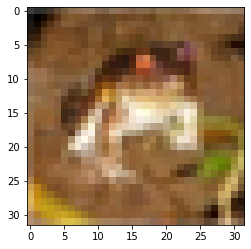

In [5]:
plt.imshow(x_train[0])

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train=y_train.reshape(-1,)
classes[y_train[0]]

'frog'

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
convet_model = models.Sequential([
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Conv2D(filters=64 ,kernel_size=(3,3),activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),

      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(10,activation='softmax'),
])

In [10]:
convet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

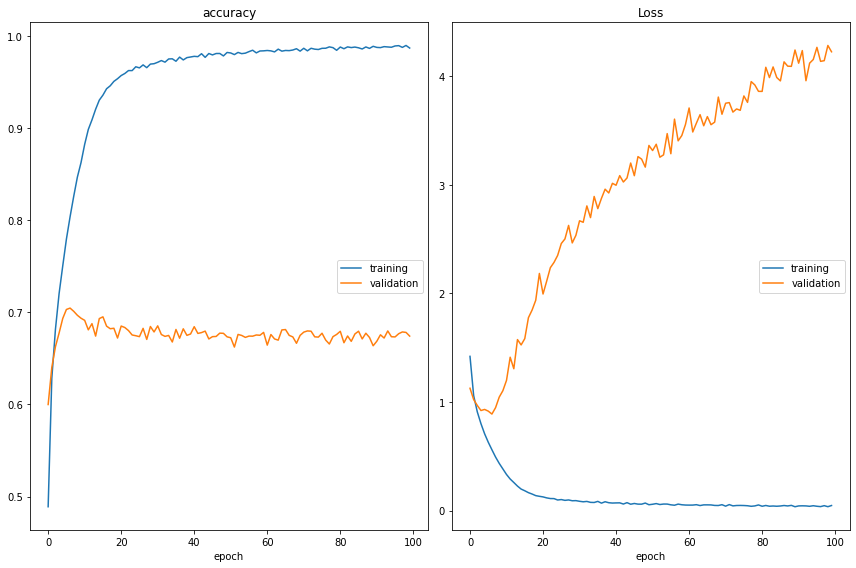

accuracy
	training         	 (min:    0.489, max:    0.990, cur:    0.987)
	validation       	 (min:    0.600, max:    0.705, cur:    0.674)
Loss
	training         	 (min:    0.035, max:    1.420, cur:    0.046)
	validation       	 (min:    0.889, max:    4.284, cur:    4.226)
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9869 - val_loss: 4.2258 - val_accuracy: 0.6742


In [11]:
# Training
history = convet_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test ,y_test),
    verbose=1,
    #steps_per_epoch=x_train.shape[0] // 512,
    callbacks=[PlotLossesKeras()]
    )

In [15]:
convet_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.2258 - accuracy: 0.6742


[4.225846290588379, 0.6741999983787537]